# Key Data & Analytics Technologies

| **Category** | **Open Source** | **AWS** | **Azure** | **Google Cloud** | **Commercial** |
|--------------|-----------------|---------|-----------|------------------|----------------|
| **Data Ingestion** | Apache Kafka, Apache NiFi | Kinesis, DMS | Event Hubs, Data Factory | Pub/Sub, Dataflow | MuleSoft, Informatica |
| **Storage** | HDFS, Apache Cassandra | S3, Redshift, DynamoDB | Data Lake, Synapse, Cosmos DB | Cloud Storage, BigQuery | Snowflake, MongoDB |
| **Stream Processing** | Apache Flink, Kafka Streams | Kinesis Analytics | Stream Analytics | Dataflow | - |
| **Batch Processing** | Apache Spark, Hadoop | EMR, Glue | HDInsight, Databricks | Dataproc, Dataflow | Databricks |
| **Machine Learning** | TensorFlow, PyTorch, MLflow | SageMaker, Bedrock | Azure ML | AI Platform, Vertex AI | - |
| **Visualization** | Apache Superset, Grafana | QuickSight | Power BI | Looker Studio | Tableau, Qlik |
| **Data Governance** | Apache Atlas, Apache Ranger | Glue Catalog, IAM | Purview, Active Directory | Data Catalog, IAM | Collibra, Immuta |
| **Orchestration** | Apache Airflow, Prefect | Step Functions | Logic Apps | Cloud Composer | - |
| **Monitoring** | Prometheus, Grafana | CloudWatch | Monitor | Cloud Monitoring | Datadog, New Relic |

## Key Technology Pairs by Use Case

| **Use Case** | **Primary Technologies** |
|--------------|-------------------------|
| **Real-time Analytics** | Kafka + Flink + Druid/ClickHouse |
| **Data Lake Architecture** | S3/HDFS + Spark + Airflow + Glue/Atlas |
| **ML Pipeline** | Spark + TensorFlow/PyTorch + MLflow + SageMaker |
| **BI Dashboard** | BigQuery/Snowflake + dbt + Tableau/Power BI |
| **Event-driven Architecture** | Kafka + Flink + Cassandra/DynamoDB |

---
---
## DataBricks :
- General method:
```
Data Sources → Kafka → HDFS → Spark → ETL → Data Warehouse → BI Tools
                    ↓
            ML Platform → Model Serving
```
- Data bricks :
```
Data Sources → Databricks Lakehouse → All Analytics & AI
```

## web topcis to big data :

**Real-Time Messaging:**
- **WebSockets ↔ Kafka:** Both handle real-time, bidirectional communication
- **Server-Sent Events ↔ Data Streams:** Push updates from server to clients

**Performance Optimization:**
- **CDN ↔ Redis/Caching:** Distribute content/data closer to consumers
- **Load Balancers ↔ Data Partitioning:** Spread traffic/data across multiple nodes

**Architecture Patterns:**
- **Microservices ↔ Data Mesh:** Break systems into independent, manageable services
- **Event-Driven Web Apps ↔ Stream Processing:** React to events in real-time

**Communication Patterns:**
- **REST APIs ↔ Data APIs:** Request-response patterns for getting information
- **Pub/Sub (WebSocket rooms) ↔ Kafka Topics:** Broadcast messages to subscribers
- **Webhooks ↔ Change Data Capture:** Notify when something changes

The core insight is that both domains solve the same fundamental challenges: moving information efficiently, handling scale, maintaining reliability, and providing real-time experiences. The solutions are remarkably similar - just applied to different use cases!

# 1. Distributed Storage Systems - Notes

## HDFS (Hadoop Distributed File System)

### What it is:
- Distributed file system (not a traditional database)
- Foundational component for many distributed data systems

### Key Characteristics:
- **Distributed storage** - spans across commodity hardware
- **Fault tolerant** - automatic replication (typically 3x)
- **Large file optimization** - designed for big files & sequential reads
- **Write-once, read-many** - access pattern
- **Block-based** - default 128MB block size

### Systems that use HDFS as storage layer:
- **Apache Hive** → SQL-like queries over HDFS
- **Apache HBase** → NoSQL database on HDFS
- **Apache Spark** → can read/write to HDFS
- **Apache Impala** → real-time SQL queries on HDFS data

### Similar Distributed File Systems:
- **Amazon S3** → object storage service
- **Google Cloud Storage** → object storage
- **Apache Ceph** → unified storage system
- **GlusterFS** → scale-out network-attached storage
- **MinIO** → S3-compatible object storage

### Key Point:
HDFS = distributed storage layer that many distributed databases and analytics systems depend on

*Note: While not a database itself, HDFS is crucial infrastructure in the distributed data ecosystem*


## Hadoop 1.x (2011-2012)
- **Core:** HDFS + MapReduce only
- **Architecture:** MapReduce handles both processing AND resource management
- **Limitation:** Single point of failure (NameNode), limited to batch processing only

## Hadoop 2.x (2013-2017) 
- **Major Addition:** YARN (Yet Another Resource Negotiator) introduced
- **Key Change:** Separated resource management from processing - YARN manages resources, MapReduce just processes
- **Benefits:** Multiple applications can run simultaneously, better resource utilization, NameNode HA added

## Hadoop 3.x (2017-present)
- **Storage:** Erasure coding reduces storage overhead from 200% to 50%
- **Performance:** Better resource utilization, improved MapReduce performance
- **Features:** Multiple NameNodes support, GPU scheduling, enhanced security, Java 8+ requirement

**Key Evolution:** Hadoop 1 → 2 added YARN for multi-tenancy | Hadoop 2 → 3 improved efficiency and reliability

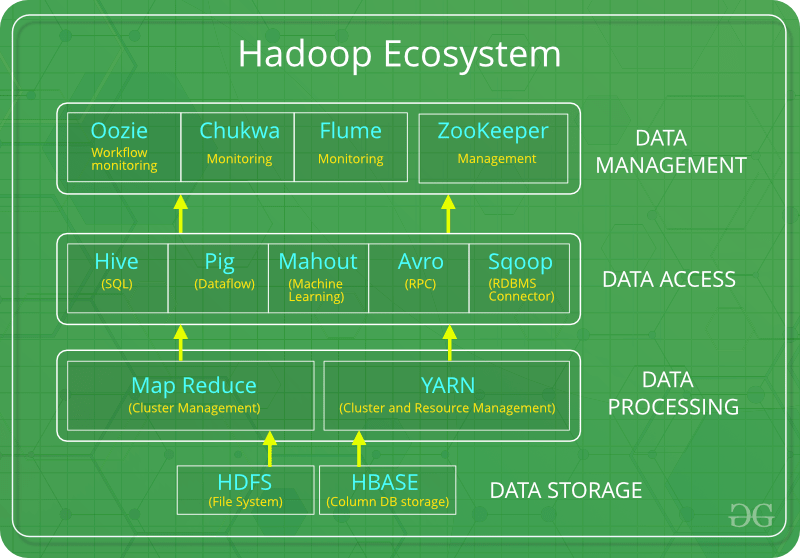

### work -1 :

```python
#mapper.py
#!/usr/bin/env python
import sys

for line in sys.stdin:
    parts = line.strip().split(',')
    if parts[0] == "InvoiceNo": continue
    try:
        qty     = float(parts[3])
        price   = float(parts[5])
        country = parts[7]
        revenue = qty * price
        sys.stdout.write(country + "\t" + str(revenue) + "\n")
    except:
        pass

#reducer.py
#!/usr/bin/env python
import sys

current_key = None
current_sum = 0.0

for line in sys.stdin:
    key, value = line.strip().split("\t")
    try:
        amt = float(value)
    except:
        continue
    if key == current_key:
        current_sum += amt
    else:
        if current_key:
            sys.stdout.write(current_key + "\t" + str(current_sum) + "\n")
        current_key = key
        current_sum = amt

if current_key:
    sys.stdout.write(current_key + "\t" + str(current_sum) + "\n")


#reduce.py

```

• We used the **Hadoop Streaming** library (`hadoop-streaming.jar`) to run Python scripts as MapReduce jobs without writing Java.

• **mapper.py** runs in parallel on each HDFS data block:
– reads CSV lines from stdin
– skips the header
– parses **Quantity** and **UnitPrice**, computes `revenue = Quantity × UnitPrice`
– emits `Country\t<revenue>`

• The **Hadoop framework** then:
– **shuffles** all mapper outputs across nodes so that records with the same country go to the same reducer
– **sorts** them by country key

• **reducer.py** runs on each country’s grouped data:
– reads sorted `Country\t<revenue>` lines
– maintains a running sum for each country
– writes `Country\t<total_revenue>` once all values for that country are processed

• **YARN** (Yet Another Resource Negotiator) allocates containers on cluster nodes to run map and reduce tasks, tracks their status, and handles retries on failure.

• **HDFS** (Hadoop Distributed File System) stores the input file (`/ecommerce/data.csv`) in distributed blocks, provides data locality (maps run on nodes holding the data), and writes the final output (`/ecommerce/output/part-00000`) back to HDFS.


---

- **Big data serialized file formats** are specialized formats designed to efficiently store, process, and transfer massive datasets across distributed systems. They prioritize compression, schema evolution, and compatibility with big data frameworks like Hadoop, Spark, and cloud platforms.     
    - **Types:**         
        - **Columnar formats** (Parquet, ORC) (60-80% size reduction) - Store data by columns for analytics, excellent compression and query performance         
        - **Row-based formats** (Avro, Sequence Files) (40-60% size reduction) - Store data by rows, better for write-heavy operations and streaming         
        - **Schema-aware formats** (Avro, Thrift) (40-60% size reduction) - Include metadata and support schema evolution without breaking compatibility         
        - **Compressed binary formats** (Protocol Buffers, MessagePack) (50-78% size reduction) - Minimize storage footprint and network transfer costs         
        - **Hybrid/specialized formats** (Delta Lake, Iceberg) (60-75% size reduction) - Modern table formats with ACID transactions and time travel capabilities